# AI ODYSSSEY: CNN ASSIGNMENT

## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### FILTERS

Filters are the most unique part of a CNN. They make the bulk of the convolutional layers of a CNN, and thus differentiate it from a normal neural network.

**Describe the following filters:**
- averaging filter:
- gaussian filter:
- median filter:
- unsharp masking:
- prewitt filter:
- sobel filter:
- laplacian filter:

**Now give an example of application of each of these filters. You are required to load an image of your choice. Then, apply these filters to those images and display the image before and after convolution.**


**Averaging Filter**

In [55]:
#ENTER YOUR CODE HERE

image_path='https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg'

import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

image_path='/content/Screenshot 2024-05-15 204456.png'
image_rgb=cv2.imread(image_path)
image_rgb=cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

def printimage(old,new):
  plt.subplot(1, 2, 1)
  plt.imshow(old)
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(new)
  plt.title('Filtered Image')
  plt.axis('off')
  plt.show()


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


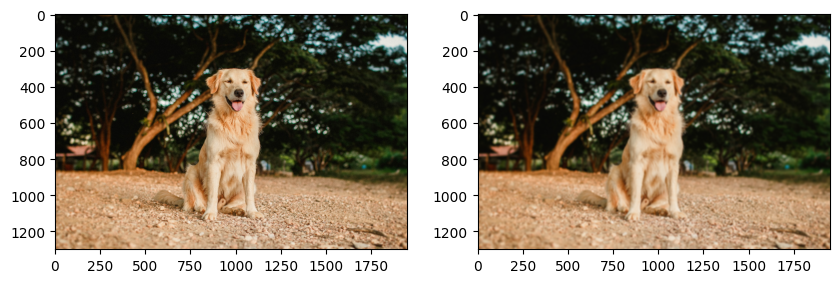

**Gaussian Filter**

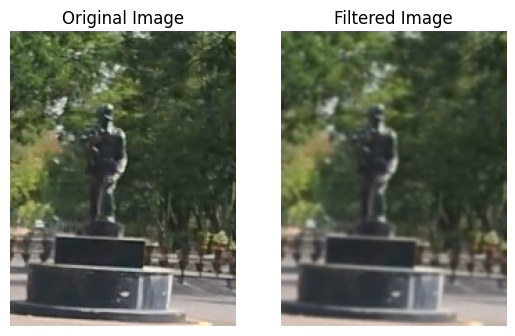

In [56]:
#ENTER YOUR CODE HERE
sigma = 1
filtered_image = cv2.GaussianBlur(image_rgb, (0, 0), sigmaX=sigma, sigmaY=sigma)
printimage(image_rgb,filtered_image)

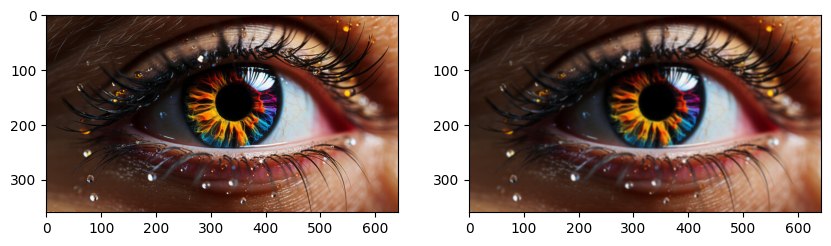

**Median Filter**

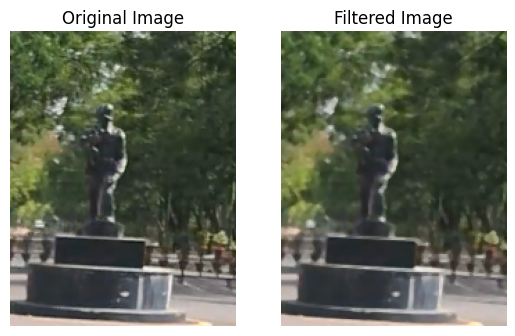

In [57]:
#ENTER YOUR CODE HERE
filtered_image=cv2.medianBlur(image_rgb, 3)
printimage(image_rgb,filtered_image)

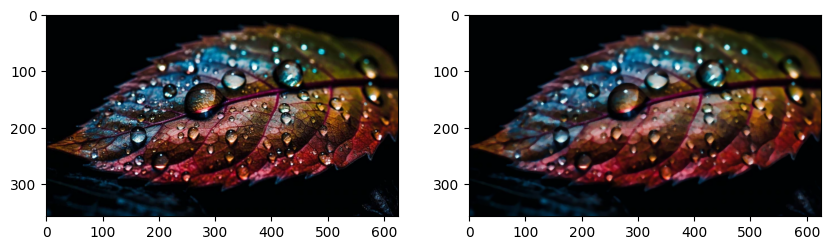

The nice images were for fun.

**Blurring is actually used for noise removal. Demonstrate.**

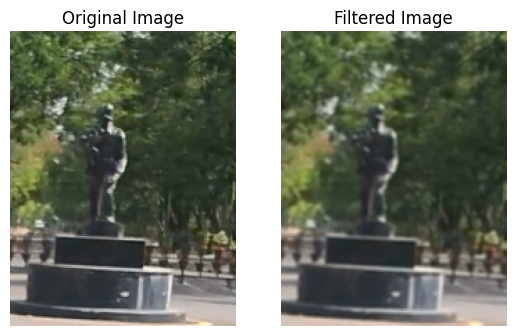

In [59]:
#ENTER YOUR CODE HERE
filtered_image=cv2.blur(image_rgb,(3,3))
printimage(image_rgb,filtered_image)

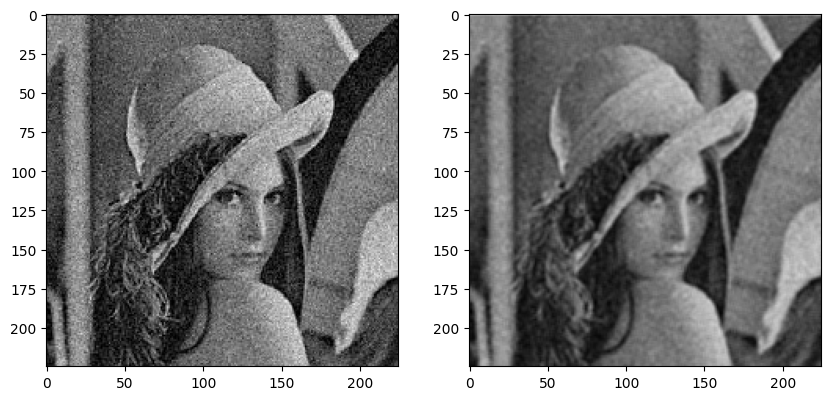

**Unsharp Masking**

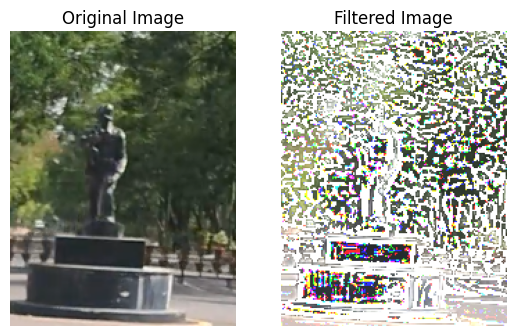

In [66]:
#ENTER YOUR CODE HERE
sigma = 1.5
blurred_image = cv2.GaussianBlur(image_rgb, (0, 0), sigmaX=sigma, sigmaY=sigma)
amount = 1.5
filtered_image = np.clip(image_rgb + (image_rgb - blurred_image) * amount, 0, 255).astype(np.uint8)
printimage(image_rgb,filtered_image)

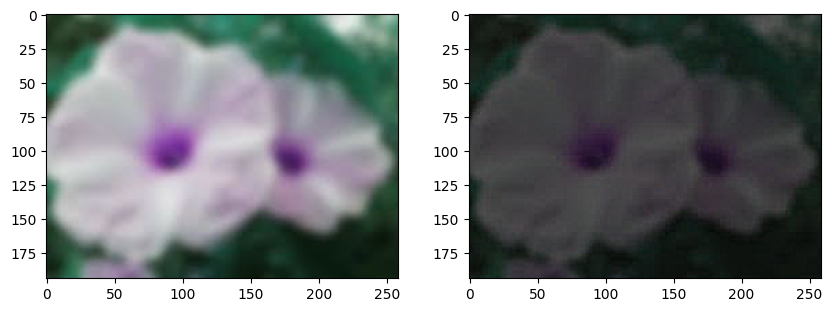

**Prewitt Horizontal Filter**

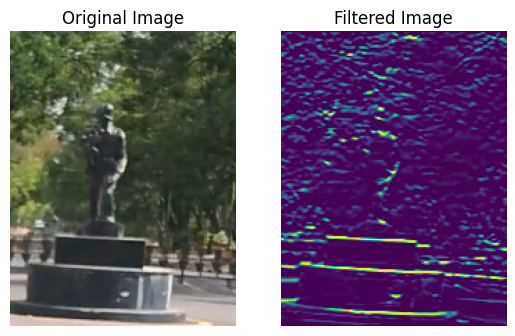

In [69]:
#ENTER YOUR CODE HERE
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

prewitt_horizontal = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
horizontal = cv2.filter2D(gray_image, -1, prewitt_horizontal)

printimage(image_rgb,horizontal)

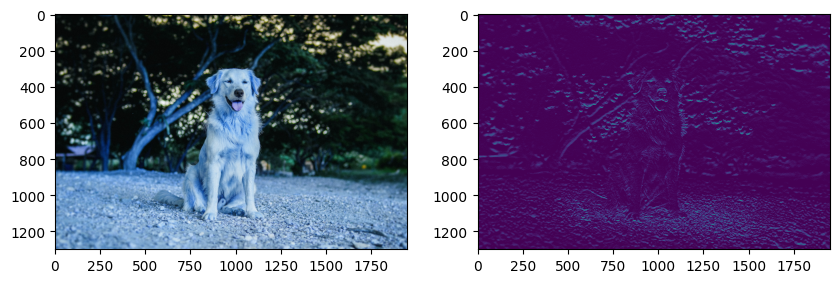

**Prewitt Vertical Filter**

In [70]:
#ENTER YOUR CODE HERE

prewitt_vertical = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
vertical = cv2.filter2D(gray_image, -1, prewitt_vertical)

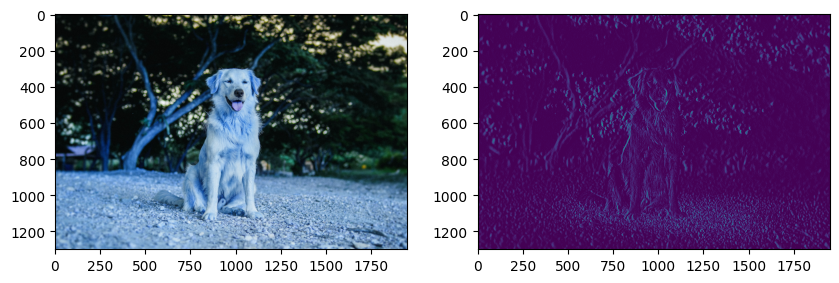

**Combined Prewitt**

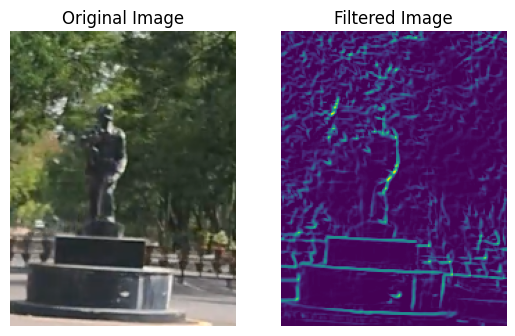

In [71]:
#ENTER YOUR CODE HERE
filtered_image=cv2.addWeighted(horizontal,0.5,vertical,0.5,0)
printimage(image_rgb,filtered_image)

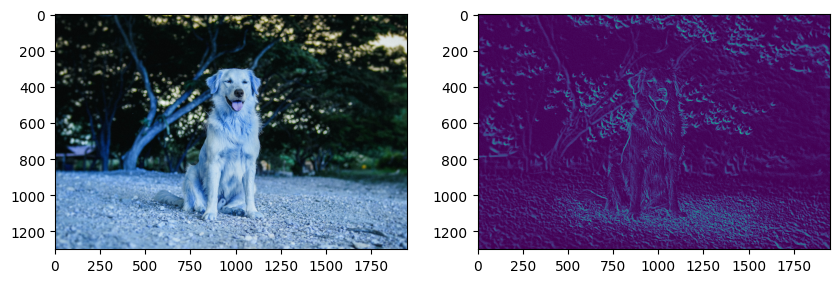

**Sobel Filter**

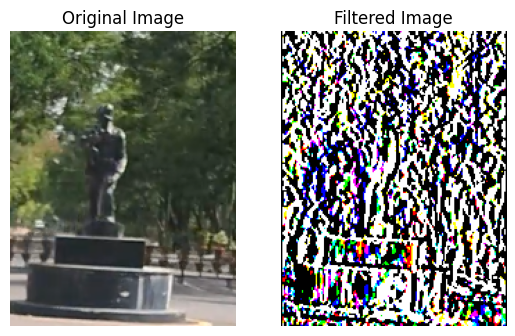

In [62]:
#ENTER YOUR CODE HERE
filtered_image=cv2.Sobel(image_rgb,cv2.CV_64F,1,0,ksize=3)
printimage(image_rgb,filtered_image)

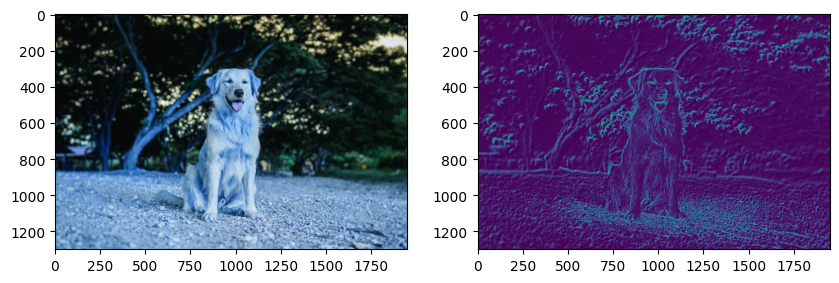

As you can see, the quality of sobel filter is better than that of combined prewitt.

**Laplacian Filter**

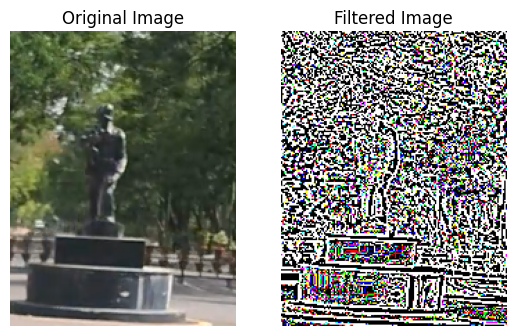

In [61]:
#ENTER YOUR CODE HERE
filtered_image=cv2.Laplacian(image_rgb,cv2.CV_64F)
printimage(image_rgb,filtered_image)

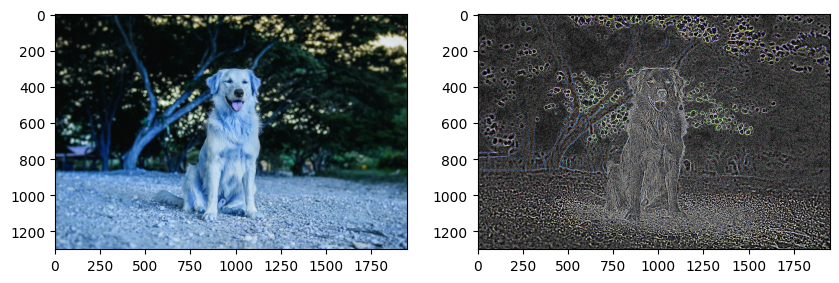

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

**What is the no. of elements in the training and testing datasets?**

In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
#ENTER YOUR CODE HERE
print(X_train.shape[0])
print(X_test.shape[0])

60000
10000


In [3]:
y_train[0]

5

**What are the labels in the dataset?**

In [4]:
#ENTER YOUR CODE HERE
set(y_train)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

**Visualise one image for each label.**

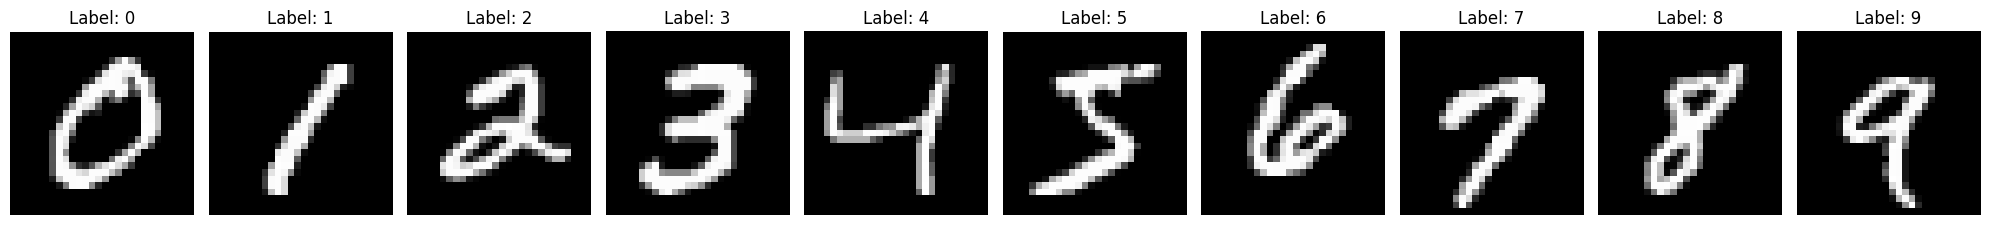

In [5]:
#ENTER YOUR CODE HERE
import numpy as np
fig, axes = plt.subplots(1, 10, figsize=(20, 3))
for i in range(10):
    index = np.where(y_train == i)[0][0]
    image = X_train[index]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {i}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**One-hot encode the y labels.**

In [6]:
#ENTER YOUR CODE HERE
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [7]:
y_test.shape

(10000, 10)

**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

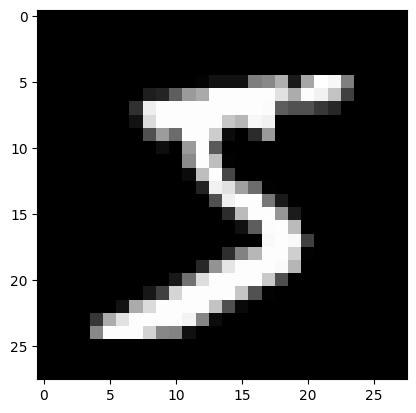

In [8]:
#ENTER YOUR CODE HERE
print(X_train[0])
plt.imshow(X_train[0], cmap='gray')


**Change the dimension of the training and testing datasets for it to become a 3D one. Remember this is a grayscale image.**

In [9]:
#ENTER YOUR CODE HERE
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [10]:
X_train[0].shape

(28, 28, 1)

**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [11]:
#ENTER YOUR CODE HERE
X_train = X_train/255
X_test = X_test/255

**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [13]:
#ENTER YOUR CODE HERE
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [14]:
#ENTER YOUR CODE HERE
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Now split the dataset into a validation part.**

In [15]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split
x_train, x_val, Y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


**Fit the model and plot the training history.**

In [19]:
#ENTER YOUR CODE HERE
history=model.fit(x_train, Y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0505 - val_accuracy: 0.9886
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0464 - val_accuracy: 0.9896
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0058 - accuracy: 0.9979 - val_loss: 0.0544 - val_accuracy: 0.9879
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0521 - val_accuracy: 0.9898
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.0524 - val_accuracy: 0.9890
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0574 - val_accuracy: 0.9884
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0788 - val_accuracy:

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

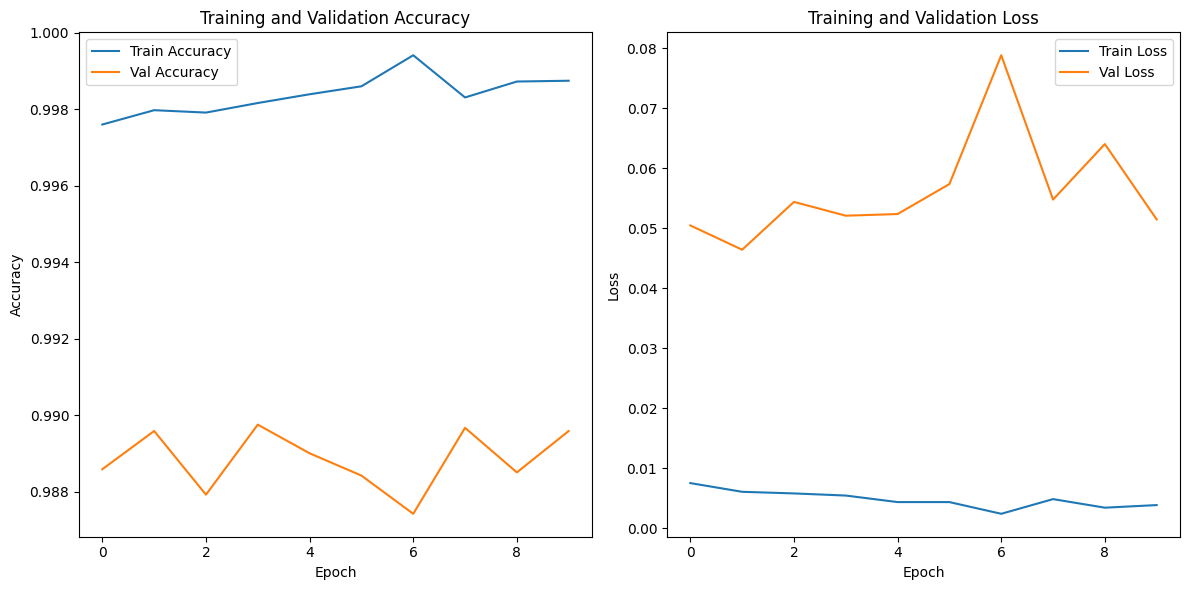

In [20]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Now test your model on the training dataset and print the classification matrix.**

In [26]:
#ENTER YOUR CODE HERE
y_pred=model.predict(X_test)
y_pred_int=np.argmax(y_pred,axis=1)
y_pred_int = to_categorical(y_pred_int,10)
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_int))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00      1139
           2       1.00      1.00      1.00      1029
           3       1.00      1.00      1.00      1013
           4       1.00      1.00      1.00       966
           5       1.00      1.00      1.00       902
           6       1.00      1.00      1.00       949
           7       1.00      1.00      1.00      1028
           8       1.00      1.00      1.00       969
           9       1.00      1.00      1.00      1015

   micro avg       1.00      1.00      1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000
 samples avg       1.00      1.00      1.00     10000



**Lets visualise the prediction, along with the input now.**

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


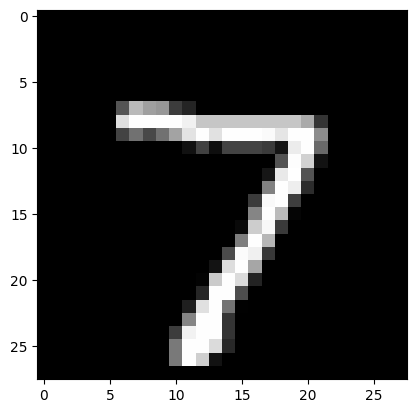

In [35]:
#ENTER YOUR CODE HERE
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
print(y_test[0])
print(y_pred_int[0])


**But what did the convolution layers do? Lets visualise the outputs of filters for the first test image.**

**Do the same for the output of the max pooling layer.**

In [ ]:
#ENTER YOUR CODE HERE

**Output of the third convolution layer.**

In [ ]:
#ENTER YOUR CODE HERE

**It is now clearly visible that the each filter is extracting a particular feature.**